<h1 align="center"> 海洋数据分析 第十讲</h1>
<h3 align="right">主讲人: 陈笔澄</h3>
<h2>目录<span class="tocSkip"></span></h2>

- ## [数据分析套件--SciPy](#sec:scipy)
- ## [SciPy线性拟合分析](#sec:linear)
- ## [SciPy快速傅里叶分析](#sec:fft)

---

## <img src="https://scipy.org/images/logo.svg" width=25> SciPy学习目的:
- ### <font color="gray">数据获取</font> <font size=6>数据分析</font> <font color="gray">成果展示</font>
- ### 使用SciPy模块增加数据分析能力
- ### 以模块化的思维更新我们的数据分析体系
- ### 常用的线性回归分析和能谱分析
## 帮助链接: 
- ### 官方网站: https://scipy.org
- ### 官方快速入门指南: https://docs.scipy.org/doc/scipy/tutorial/index.html

---
---

## 

---
---

## 🗂 <a id = "sec:scipy"> 数据分析套件--<img src="https://scipy.org/images/logo.svg" width=25>SciPy </a>

---

## ❓ 什么是SciPy

## 💡 Science Python
- ### “Fundamental algorithms for scientific computing in Python”--科学计算的基本算法
- ### 数据类型基础--NumPy
- ### 算法高度优化、语法结构简洁、开源

---

## ❓ SciPy包含哪些核心模块

## 💡 核心模块:
- ### `scipy.special` -- 特殊函数（如，贝塞尔函数）
- ### `scipy.integrate` -- 积分
- ### `scipy.optimization` -- 优化算法（如，解非线性方程的牛顿共轭梯度算法）
- ### `scipy.interpolation` -- 插值
- ### `scipy.fft` -- 快速傅里叶算法
- ### `scipy.signal` -- 信号处理
- ### `scipy.linalg` -- 线性算法(如，线性回归)
- ### `scipy.sparse` -- 系数矩阵算法
- ### `scipy.spatial` -- 空间数据结构与算法(如，包络线)
- ### `scipy.stat` -- 统计算法
- ### `scipy.ndimage` -- 多维图像处理算法
- ### `scipy.io` -- 文件输入输出函数库(包含MATLAB数据格式、NetCDF数据格式等)

---
---

## 

---
---

## 🗂 <a id = "sec:linear"> SciPy线性拟合分析 </a>

## 运用`scipy.linalg.lstsq()`可实现最小二乘法拟合

---

## 💡 一个简单的线性回归范例，拟合结果为`y=ax+b`,其中`a=3`, `b=5`

In [75]:
## 载入相应模块
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [46]:
## 创建数据
c_a = 3
c_b = 5
err = 5
xi = np.arange(20)
yi = c_a * xi + c_b + err*(np.random.rand(xi.shape[0])-0.5)

[-1.02381513  0.06754502 -2.37778129 -2.05079127  2.48214019  0.39486905
 -2.40896051  0.87258713 -1.64149813 -0.96344774  0.30081163  1.3184899
 -2.2185762  -0.34208041 -2.39829379 -1.13030163 -0.38353302 -0.80104285
  1.01852075 -1.27496941]


In [32]:
## 线性拟合
mat = nddp.hstack([np.ones(xi.shape)[:, np.newaxis], xi[:, np.newaxis]])
coef, resid, rank, sigma = linalg.lstsq(mat, yi)

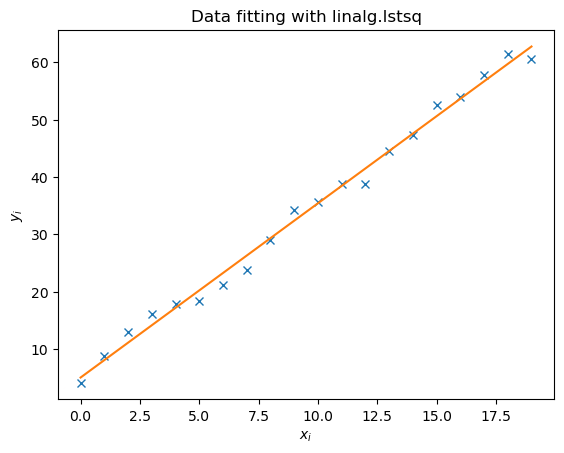

In [52]:
## 成果展示
plt.plot(xi,yi,'x',xi,coef[0]+coef[1]*xi)
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

---

## 💡 一个复杂的线性回归范例，拟合结果为$y=ae^x+bx^2+cx+d$,其中`a=2`, `b=1`, `c=4`, `d=6`

In [72]:
## 载入相应模块
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [71]:
## 创建数据
c_a = 2
c_b = 1
c_c = 4
c_d = 6
err = 1
xi = np.linspace(0, 2, 51)
yi = c_a * np.exp(xi) + c_b*xi**2 + c_c*xi + c_d + err*(np.random.rand(xi.shape[0])-0.5)

In [73]:
## 线性拟合
mat = np.vstack([np.exp(xi), xi**2, xi, np.ones(xi.shape)]).T
coef, resid, rank, sigma = linalg.lstsq(mat, yi)
print("The fit result of linear regression: y={:4.2f}*exp(x)+{:4.2f}*x**2+{:4.2}*x+{:4.2}"
      .format(coef[0], coef[1], coef[2], coef[3]))

The fit result of linear regression: y=1.59*exp(x)+1.72*x**2+ 3.9*x+ 6.5


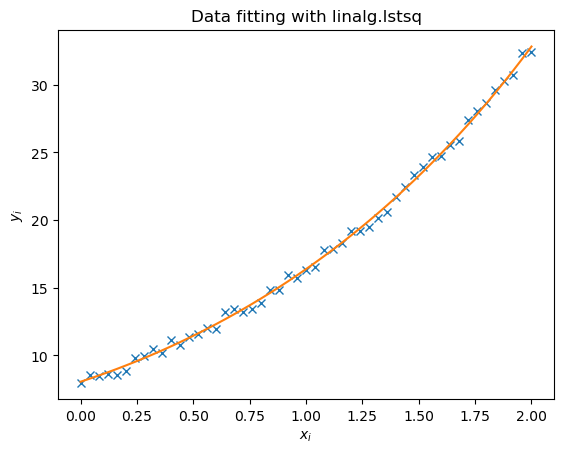

In [74]:
## 成果展示
plt.plot(xi,yi,'x',xi,coef[0]*np.exp(xi)+coef[1]*xi**2+coef[2]*xi+coef[3])
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

---
---

## 

---
---

## 🗂 <a id = "sec:fft"> SciPy快速傅里叶分析 </a>

## ❓ 什么是快速傅里叶分解

## 💡 对于一个序列x[n], n=0, 1, ..., N-1，可对序列x[n]做正傅里叶变换获得另一个序列y[k]:

## $y[k] = \sum_{n=0}^{N-1}e^{-2\pi ik\frac{n}{N}}x[n]$

## 其中y[k]表示傅里叶基函数$e^{-2\pi ik\frac{n}{N}}$的振幅，k为波数(k=-N/2, ...,0, (N-1)/2)。

## 同时，可以利用傅里叶逆变换将y[k]与基函数$e^{-2\pi ik\frac{n}{N}}$还原为序列x[n]:

## $x[n] = \frac{1}{N-1}\sum_{k=-N/2}^{(N-1)/2}e^{-2\pi ik\frac{n}{N}}y[k]$

---

## 一个非常简单的例子: $x[n] = sin(2\pi* 2\frac{n}{N})$

In [106]:
## 载入相应模块
from math import pi
from scipy.fft import rfft, irfft
import matplotlib.pyplot as plt

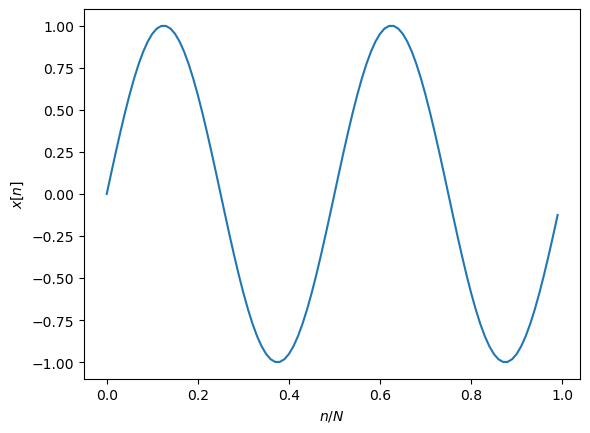

In [100]:
## 生成三角函数序列
N = 100
ind = np.arange(N)
xn = np.sin(2*pi*2*ind/N)

plt.plot(ind/N,xn)
plt.xlabel('$n/N$')
plt.ylabel('$x[n]$')
plt.show()

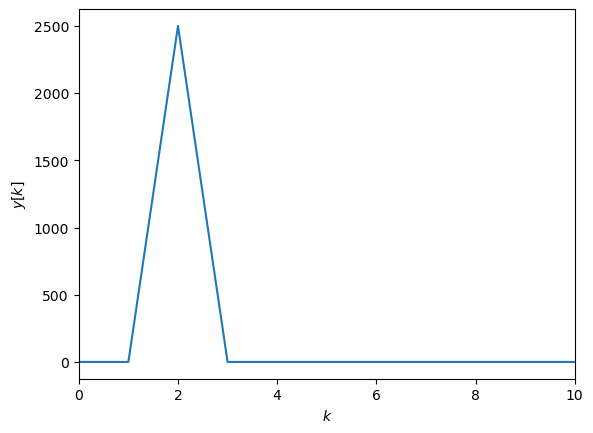

In [121]:
## FFT 正变化
yk = rfft(xn)

plt.plot(ind[:N//2+1],yk*np.conjugate(yk)) # ng'pu
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.xlim(0, 10)
plt.show()

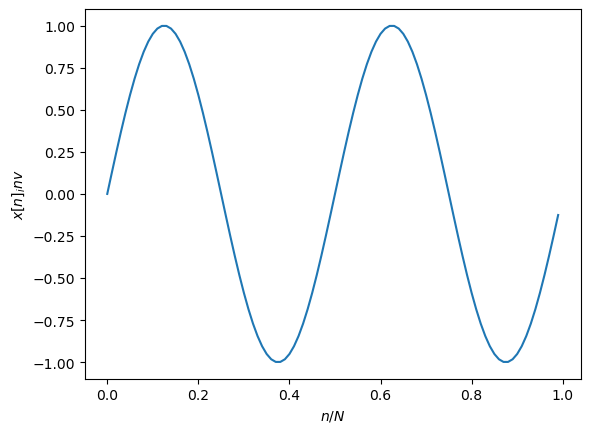

In [111]:
## FFT逆变换
xn_inv = irfft(yk)

plt.plot(ind/N,xn_inv)
plt.xlabel('$n/N$')
plt.ylabel('$x[n]_inv$')
plt.show()

---

## ✏️ 如果例子变成: $x[n] = 5*sin(2\pi *2\frac{n}{N})+10*sin(2\pi 4*\frac{n}{N})$会怎样？

---
---